In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

In [5]:
# Load dataset
file_path = 'C:/Users/USER/Downloads/produk_elektronik.csv'
df = pd.read_csv(file_path)

In [6]:
# 1. menampilkan informasi tipe data dan cek missing values
print("\nInformasi Dataset:")
print(df.info())
print("\nJumlah Missing Values:")
print(df.isnull().sum())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB
None

Jumlah Missing Values:
produk_id         0
nama_produk       0
kategori          0
harga            30
rating           50
jumlah_ulasan    20
negara_asal       0
dtype: int64


In [7]:
# 2. Penanganan Missing Values
# a. Cek jumlah missing values di setiap kolom
missing_values = df.isnull().sum()
print("\nMissing Values per Kolom:")
print(missing_values)


Missing Values per Kolom:
produk_id         0
nama_produk       0
kategori          0
harga            30
rating           50
jumlah_ulasan    20
negara_asal       0
dtype: int64


2b. Missing values dapat mempengaruhi analisis dengan beberapa cara yaitu:
1. Mengurangi jumlah sampel yang valid apabila baris dengan missing values dihapus.
2. Memengaruhi hasil statistik jika nilai yang hilang tidak terdistribusi secara acak.
3. Menyebabkan bias apabila penghapusan missing values tidak dilakukan dengan bijak.

2c. Metode yang bisa kita gunakan untuk menangani missing values pada setiap kolom:
1. Jika kolom numerik:
   - Mean: Mean digunakan untuk data bersifat kontinu dan tidak memiliki outlier.
   - Median: Apabila data yang kita gunakan memiliki outlier untuk mengurangi pengaruh nilai ekstrem.
2. Jika kolom kategorikal:
   - Modus: Kita bisa menggunakan nilai yang paling sering muncul dalam kolom tersebut.
   - Label "Unknown" atau kategori baru jika memiliki makna signifikan dalam analisis.

Alasan:
- Mean bisa kita gunakan jika distribusi normal untuk mempertahankan representasi data asli.
- Median bisa kita gunakan jika ada outlier agar tidak bias terhadap nilai ekstrem.
- Modus bisa kita gunakan karena merupakan pendekatan umum untuk kategori yang hilang.
- Label "Unknown" digunakan jika nilai yang hilang bisa memiliki arti tersendiri.


In [8]:
# d. Pemilihan metode penanganan missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)  # Diisi dengan modus untuk kategori
        else:
            df[col].fillna(df[col].median(), inplace=True)  # Diisi dengan median untuk numerik

print("\nMissing Values setelah penanganan:")
print(df.isnull().sum())



Missing Values setelah penanganan:
produk_id        0
nama_produk      0
kategori         0
harga            0
rating           0
jumlah_ulasan    0
negara_asal      0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_5868\2810092045.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Diisi dengan median untuk numerik
C:\Users\USER\AppData\Local\Temp\ipykernel_5868\2810092045.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

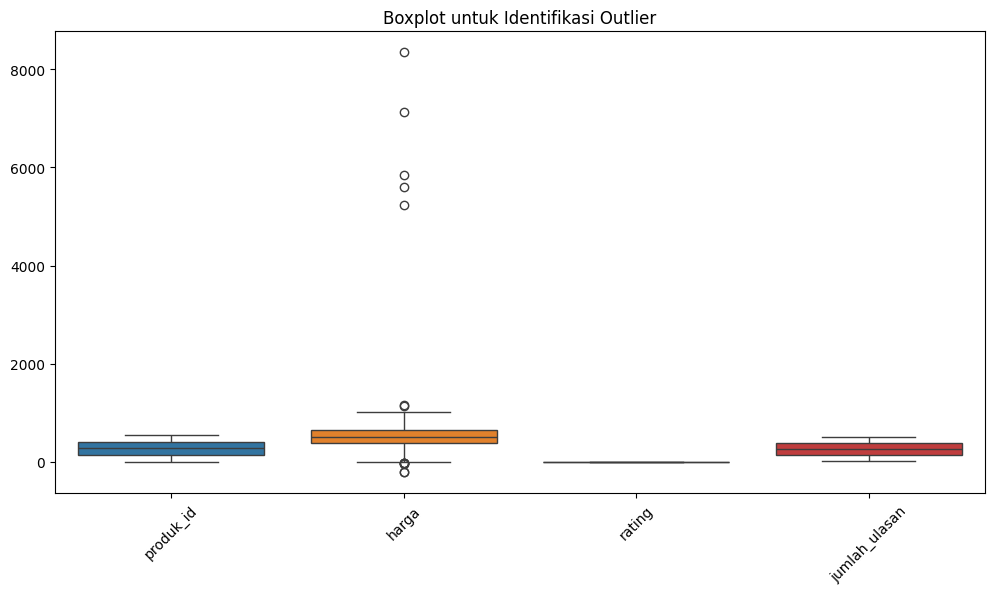

In [9]:
# 3. Identifikasi dan Penanganan Outlier
# a. Identifikasi outlier menggunakan dengan menggunakan boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=45)
plt.title("Boxplot untuk Identifikasi Outlier")
plt.show()

3b. Outlier dapat mempengaruhi analisis dengan beberapa cara, yaitu:
1. Mempengaruhi nilai rata-rata dan standar deviasi.
2. Mengubah distribusi data, yang dapat mempengaruhi model prediktif.
3. Menyebabkan hasil regresi menjadi bias.

In [10]:
# c. Penanganan outlier (Mengganti dengan batas IQR)
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

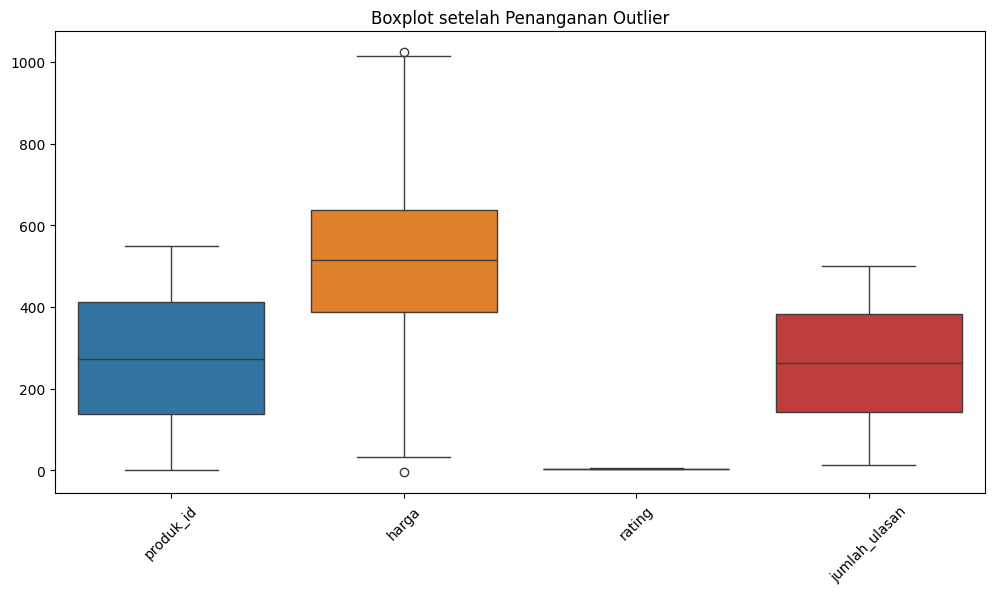

In [11]:
#d. Boxplot setelah menangani outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=45)
plt.title("Boxplot setelah Penanganan Outlier")
plt.show()

In [12]:
#4. Encoding Variabel Kategorikal
#a. Menentukan kolom yang memerlukan encoding
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nKolom kategorikal yang perlu encoding:", list(categorical_columns))


Kolom kategorikal yang perlu encoding: ['nama_produk', 'kategori', 'negara_asal']


In [13]:
# b. Menerapkan metode encoding
for col in categorical_columns:
    if df[col].nunique() <= 5:  # Jika jumlah kategori sedikit, gunakan one-hot encoding
        df = pd.get_dummies(df, columns=[col], drop_first=True)
    else:  # Jika banyak kategori, gunakan label encoding
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

print("\nDataset setelah encoding:")
print(df.head())


Dataset setelah encoding:
   produk_id  nama_produk  kategori  harga  rating  jumlah_ulasan  negara_asal
0          1            0         4  746.0     4.2          273.0            5
1          2          109         1  241.0     3.5          239.0            0
2          3          219         5  810.0     3.8          209.0            0
3          4          325         1  303.0     3.2           59.0            6
4          5          433         1  252.0     3.7           76.0            6
